<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros((X[0].shape[0]))
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    return result

x = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
v = [np.array([1, 2]), np.array([3, 4])]

print(sum_prod(x, v))

[44. 64.]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)

print(binarize(np.array([[0.3, 0.6], [2, 0.4]])))

[[0 1]
 [1 0]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def unique_rows(mat):
   return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(mat[:, col]) for col in range(mat.shape[1])]

print(unique_rows(np.array([[7,7],[9,3]])))
print(unique_columns(np.array([[7,3],[9,9]])))

[array([7]), array([3, 9])]
[array([7, 9]), array([3, 9])]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Средние значения по столбцам:
[ 0.40537481 -0.1443763  -0.70156667  0.33229791 -0.42587185  0.40675637
  0.18395332]
Дисперсии по столбцам:
[0.21914552 1.50735722 0.29060098 2.1765991  0.13230377 0.18407014
 0.22896864]
Средние значения по строкам:
[ 0.11611238  0.33241859 -0.42428771]
Дисперсии по строкам:
[0.41039792 0.98679249 0.83058792]


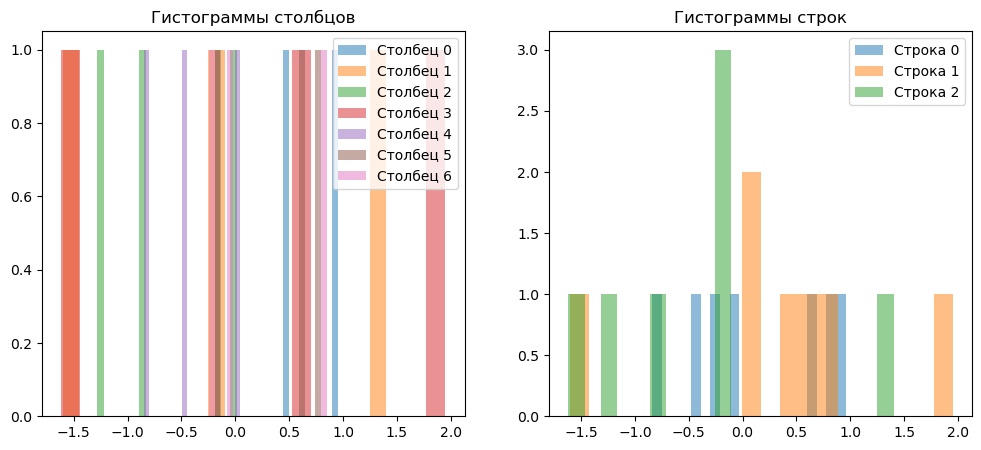

[[ 0.95592512 -0.2327996  -0.83936095  0.6654159  -0.47250909  0.79094575
  -0.05483048]
 [ 0.4485161  -1.6018876   0.01668478  1.94946338  0.04109572  0.62136071
   0.85169702]
 [-0.18831681  1.4015583  -1.28202383 -1.61798554 -0.84620218 -0.19203734
  -0.24500656]]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def generate_normal_matrix(m, n):
    matrix = np.random.normal(0, 1, (m, n))
    
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)

    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)

    print("Средние значения по столбцам:")
    print(col_means)
    print("Дисперсии по столбцам:")
    print(col_variances)

    print("Средние значения по строкам:")
    print(row_means)
    print("Дисперсии по строкам:")
    print(row_variances)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    for i in range(n):
        ax1.hist(matrix[:, i], bins=20, alpha=0.5, label=f"Столбец {i}")
    ax1.set_title("Гистограммы столбцов")
    ax1.legend()

    for i in range(m):
        ax2.hist(matrix[i, :], bins=20, alpha=0.5, label=f"Строка {i}")
    ax2.set_title("Гистограммы строк")
    ax2.legend()

    plt.show()

    return matrix

print(generate_normal_matrix(3,7))

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def chess(m, n, a, b):
    mat = np.zeros((m, n), dtype=int)
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                mat[i, j] = a
            else:
                mat[i, j] = b
    
    return mat

print(chess(5,5,7,3))

[[7 3 7 3 7]
 [3 7 3 7 3]
 [7 3 7 3 7]
 [3 7 3 7 3]
 [7 3 7 3 7]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

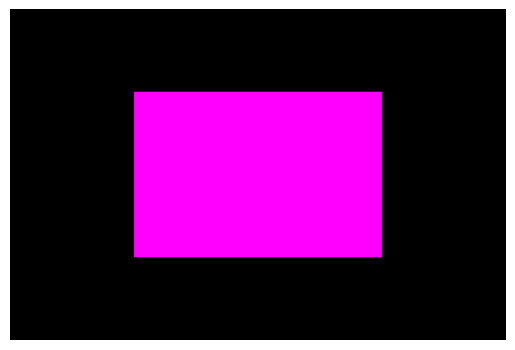

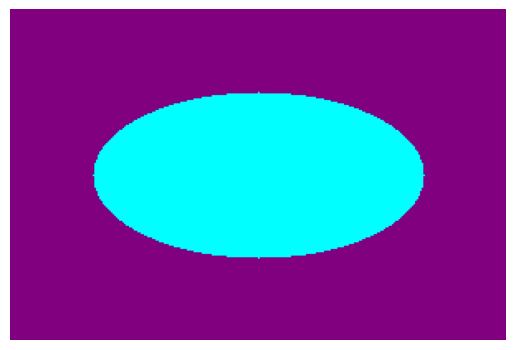

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.ones((m, n, 3), dtype=np.uint8) * np.array(background_color, dtype=np.uint8)
    start_x = (n - a) // 2
    start_y = (m - b) // 2

    image[start_y:start_y + b, start_x:start_x + a] = rectangle_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.ones((m, n, 3), dtype=np.uint8) * np.array(background_color, dtype=np.uint8)
    x0, y0 = n // 2, m // 2

    for y in range(m):
        for x in range(n):
            # Уравнение эллипса
            if ((x - x0)**2 / a**2) + ((y - y0)**2 / b**2) <= 1:
                image[y, x] = ellipse_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()

draw_rectangle(150, 100, 200, 300, [255, 0, 255], [0, 0, 0]) 
draw_ellipse(100, 50, 200, 300, [0, 255, 255], [128, 0, 128]) 

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def analyze_time_series(series, p):
    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.std(series)

    local_max_indices, _ = find_peaks(series)
    local_maxima = series[local_max_indices]

    local_min_indices, _ = find_peaks(-series)
    local_minima = series[local_min_indices]

    moving_average = np.convolve(series, np.ones(p)/p, mode='valid')

    return {
        "Математическое ожидание": mean,
        "Дисперсия": variance,
        "СКО": std_dev,
        "локальный максимум": local_maxima,
        "локальный минимум": local_minima,
        "Вычисление скользящего среднего с размером окна p": moving_average
    }

series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
p = 3
print(analyze_time_series(series, p),)

{'Математическое ожидание': 6.5, 'Дисперсия': 11.916666666666666, 'СКО': 3.452052529534663, 'локальный максимум': array([], dtype=int32), 'локальный минимум': array([], dtype=int32), 'Вычисление скользящего среднего с размером окна p': array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])}


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def one_hot_encoding(labels):
    num_classes = max(labels) + 1
    one_hot_matrix = np.zeros((len(labels), num_classes))

    for i, label in enumerate(labels):
        one_hot_matrix[i][label] = 1
    
    return one_hot_matrix

print(one_hot_encoding( [0, 2, 3, 0]))


[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
